# **Introduction**


Health insurance is insurance that covers the whole or a part of the risk of a person incurring medical expenses, spreading the risk over a large number of persons. By estimating the overall risk of health care and health system expenses over the risk pool, an insurer can develop a routine finance structure, such as a monthly premium or payroll tax, to provide the money to pay for the health care benefits specified in the insurance agreement. The benefit is administered by a central organization such as a government agency, private business,or not-for-profit entity.

According to the Health Insurance Association of America, health insurance is defined as "coverage that provides for the payments of benefits as a result of sickness or injury. It includes insurance for losses from accident, medical expense, disability, or accidental death and dismemberment" (p. 225).

Goal of this data processing is to predict accurately the insurance costs.



***Why is this proposal important in today’s world? How predicting a health insurance cost accurately can affect the health care/insurance field?***

Predicting health insurance costs accurately is highly significant in today's world for several reasons, and its impact on the healthcare and insurance fields is profound:

1. Affordability and Access to Healthcare:

    Accurate cost prediction allows individuals and families to plan their healthcare expenses effectively. It helps them budget for insurance premiums, deductibles, and out-of-pocket costs, making healthcare more accessible to a wider population.

2. Risk Management for Insurance Companies:

    Insurance companies rely on accurate cost prediction models to assess and manage their financial risks. When they can estimate costs more precisely, they can set appropriate premium rates, reducing the risk of underpricing or overpricing policies.

3. Improved Pricing Models:

    Accurate prediction models enable insurance companies to offer more competitive and customized insurance policies. This can lead to fairer pricing based on individual risk factors, resulting in better customer satisfaction and retention.

4. Prevent Fraud Detection:

    Predictive models can help identify potential cases of insurance fraud. By comparing predicted costs to actual claims, insurers can spot unusual patterns that may indicate fraudulent activities, saving billions of dollars annually.

5. Healthcare Resource Allocation:

    Accurate predictions can assist healthcare providers and policymakers in allocating resources effectively. For example, they can plan for healthcare facilities and services in regions where higher insurance costs are anticipated due to specific health issues.

6. Chronic Disease Management:

    Health insurers and healthcare providers can use predictive modeling to identify individuals at higher risk of chronic diseases. This allows for early interventions and preventive care, potentially reducing long-term healthcare costs and improving patient outcomes.

7. Consumer Education:

    Accurate cost predictions can empower consumers with information about the potential financial impact of their healthcare choices. This can lead to more informed decisions and encourage healthier behaviors.

8. Regulatory Compliance:

    Accurate pricing models help insurers comply with regulatory requirements related to fairness, transparency, and non-discrimination in insurance pricing, ensuring a more equitable insurance market.

9. Innovation and Competition:

    The development of advanced prediction models encourages innovation in the insurance and healthcare industries. Insurers can develop new products and services that cater to specific customer needs, fostering healthy competition.

10. Data-Driven Decision-Making:

    Data-driven insights from predictive models enable insurance companies and healthcare providers to make more informed decisions. This can include decisions related to network design, reimbursement rates, and coverage policies.

11. Public Health Initiatives:

    Accurate cost predictions can inform public health initiatives and interventions. For instance, it can help policymakers target resources to address specific health issues affecting a community.

12. Reducing Healthcare Costs:

    By accurately predicting insurance costs and focusing on preventive measures and early interventions, the overall cost of healthcare can be reduced, benefiting both individuals and the healthcare system as a whole.
    
In summary, accurate health insurance cost prediction is essential for creating a more efficient, equitable, and sustainable healthcare and insurance system. It enhances access to healthcare, ensures fair pricing, supports fraud detection, and contributes to improved health outcomes for individuals and communities. As technology and data analytics continue to advance, the importance of predictive modeling in the healthcare and insurance fields will only grow.










# **Overview of the dataset**

We will work on `Health_insurance_cost.csv` dataset which contains **7 features** and **1338 observations**. Each observation contains age, gender, BMI, Children, smoking_status, location data of an individual. The **target variable is health_insurance_price** and is stored in `Health_insurance_cost.csv` file.

Out of 7 features 3 are numerical and the rest are categorical. We will explore the dataset further in our analysis.

Now, let's explore the existing features of the dataset.

This dataset has 6 variable:

1. Age: age of primary beneficiary.

2. Sex: insurance contractor gender, female, male.

3. BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9.

4. Children: Number of children covered by health insurance/Number of dependents.

5. Smoker: Is the person a smoker or not.

6. location: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7. health_insurance_price: Individual medical costs billed by health insurance.

In [1]:
# Libraries for analysis
import numpy as np
import pandas as pd

# Libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
df = pd.read_csv("Health_insurance_cost.csv")

# First 5 rows of dataset
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


# Basic Exploration

In [3]:
# Shape of the dataset
n,m = df.shape
print(f'The Dataset has {n} rows and {m} columns')

The Dataset has 1338 rows and 7 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [6]:
df.nunique()

age                         47
gender                       2
BMI                        545
Children                     6
smoking_status               2
location                     4
health_insurance_price    1335
dtype: int64

In [7]:
df.duplicated().sum()
# Here we can see one duplicate data in the dataset , this duplicate we are going to drop in further EDA and data pre-processing step.

1

# **EDA & Pre-Processing**

In [8]:
# Making the column cases uniform
df.columns = df.columns.str.lower()
df.head()

,age,gender,bmi,children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [9]:
# Droping the duplicate data entry.
df.drop_duplicates(inplace=True)
# Verifing the data again
df.duplicated().sum()

0

In [10]:
# Filling null Values
df['age'].fillna(df['age'].mean(), inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [11]:
df['age'] = df['age'].round(0)
df['age'] = df['age'].astype(dtype='int64')

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

age                       0
gender                    0
bmi                       0
children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

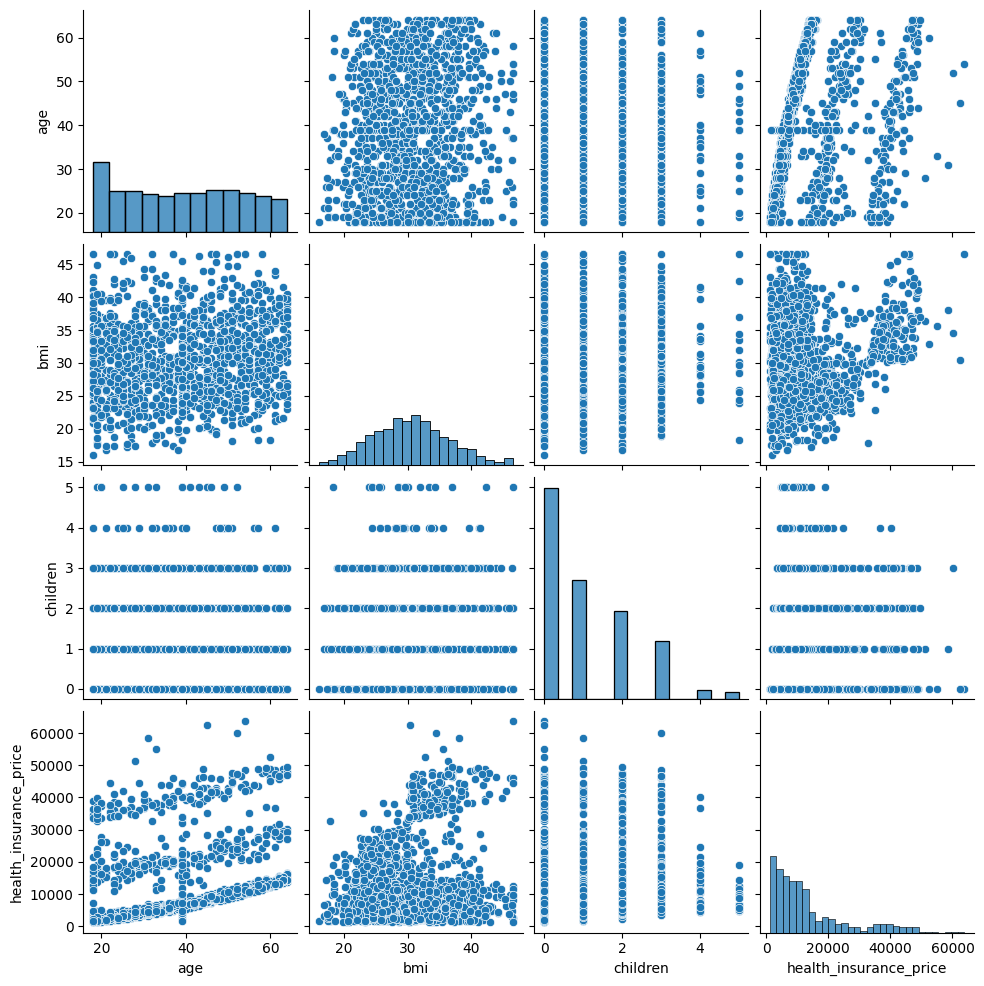

In [31]:
# Correlation matrix
sns.pairplot(data = df)

**Univeriate Analysis**

In [15]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [16]:
df['age'].value_counts()

18    68
19    66
39    53
46    29
20    29
48    29
50    29
22    28
28    28
23    28
27    28
24    28
26    28
51    28
49    28
53    28
54    27
40    27
21    27
45    27
43    27
47    27
30    27
52    27
42    27
29    26
41    26
44    26
56    26
25    26
57    25
37    25
36    25
58    25
33    25
38    25
31    25
59    25
32    24
55    24
34    24
35    24
61    23
60    23
64    22
62    22
63    21
Name: age, dtype: int64

In [17]:
categorical = df[['gender','smoking_status','location']]
numerical = df[['age','bmi','children']]

<ipython-input-18-5cdcb39a2ac7>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())
<ipython-input-18-5cdcb39a2ac7>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())
<ipython-input-18-5cdcb39a2ac7>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


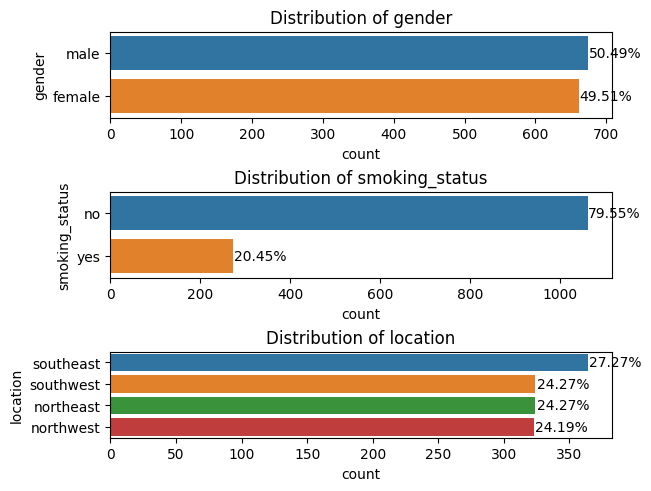

In [18]:
fig, axes = plt.subplots(3,1, constrained_layout =True) # Creating the subplots for clear and concise summary
axes = axes.flatten()
j = 0

for i in categorical:
        ax = sns.countplot(y=df[i], ax = axes[j], order = df[i].value_counts().index)
        j+=1
        ax.set_xticklabels(ax.get_xticklabels())
        ax.set_title(f"Distribution of {i}")

        for k in ax.patches:
            percentage = '{:.2f}%'.format(100 * k.get_width()/len(df))
            x = k.get_y()+ k.get_height()/2
            y = k.get_width()+1
            ax.annotate(percentage, (y, x), va='center')





    1. In the data, we have around 49.51% females and 50.49% males which shows that no of men and women applied for insurance is similar.
    2. 20.45% of the individuals don't Smoke
    3. 27.27% people live in southwest.
    



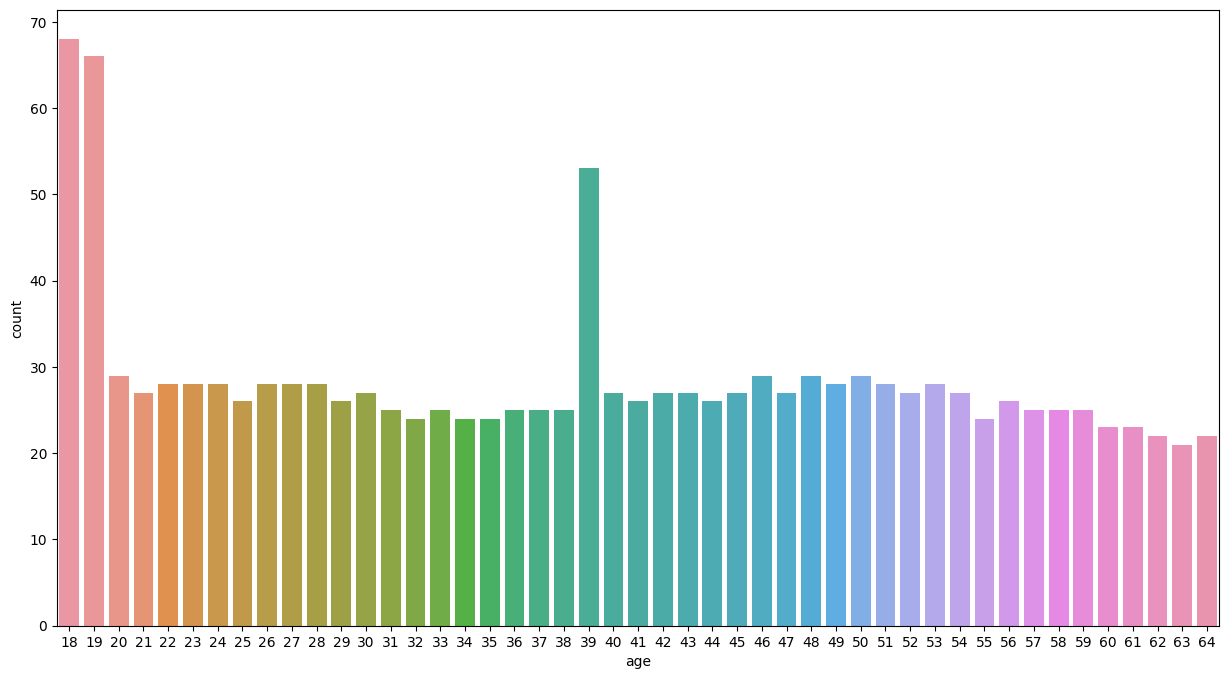

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['age'])
plt.show()

From this count plot on age column its shows there is more population people from the age of 18,19 compared to other age people

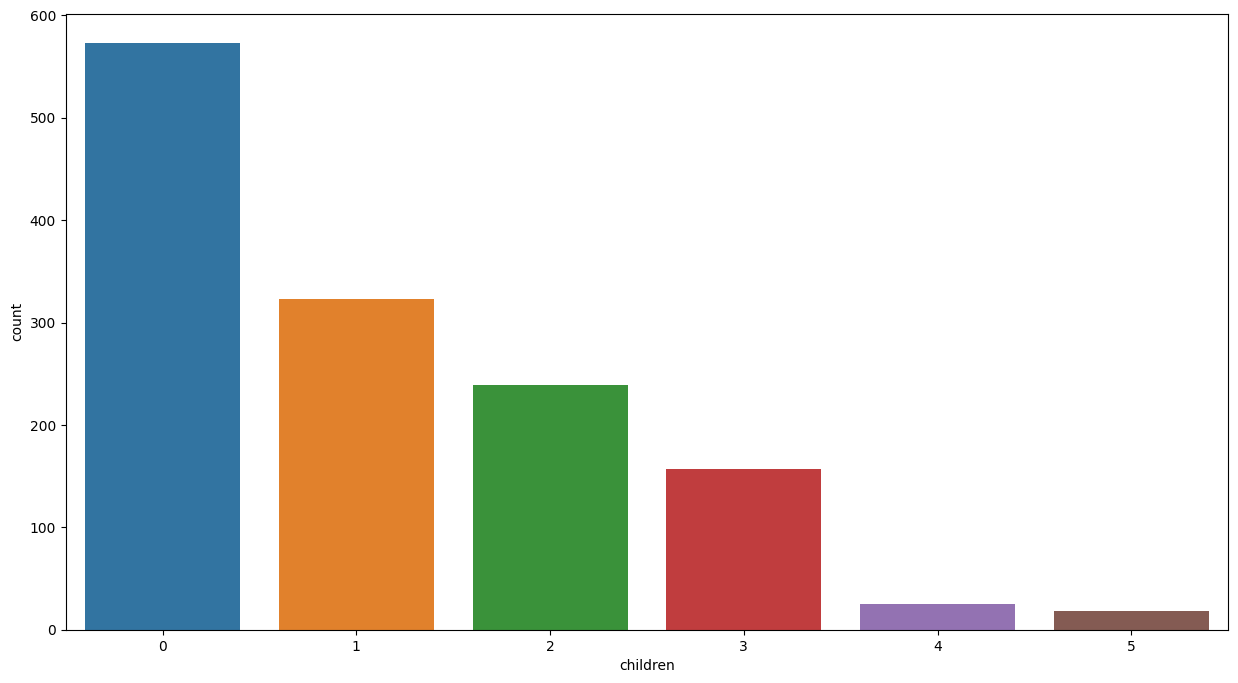

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['children'])
plt.show()

From this count plot on children column its shows that most of the people have no childrens.

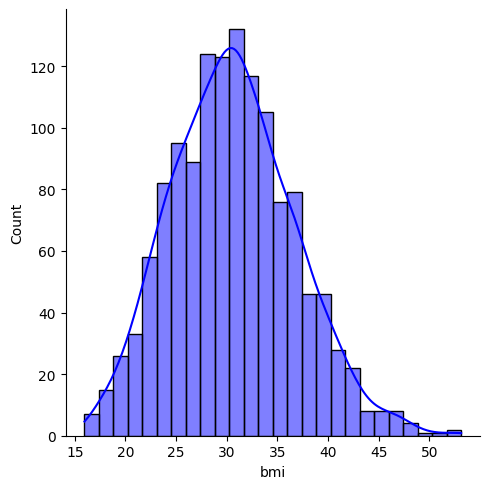

0.3002587946134501

In [21]:
sns.displot(df['bmi'], kde=True, color = 'b')
plt.show()
df['bmi'].skew()

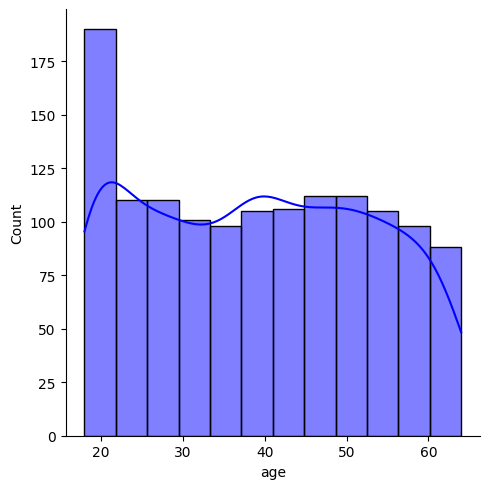

0.05820440135352566

In [22]:
sns.displot(df['age'], kde=True, color = 'b')
plt.show()
df['age'].skew()

<ipython-input-23-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

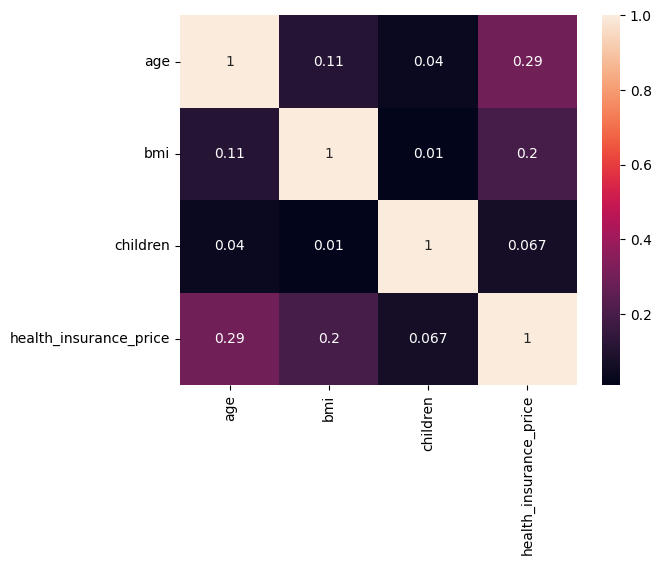

In [23]:
sns.heatmap(df.corr(),annot=True)

Here we can observe the **strong correlation between `health_insurance_price` and `age`**.

Box Plot to check the Outliers

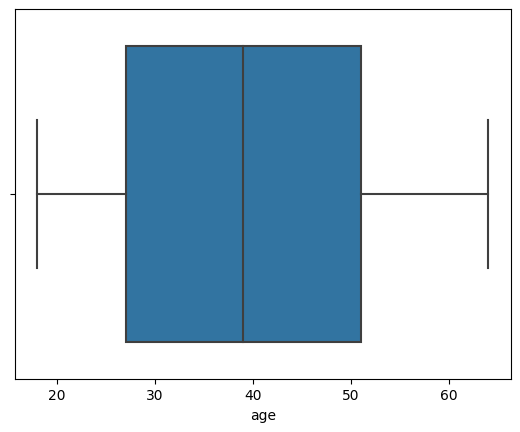

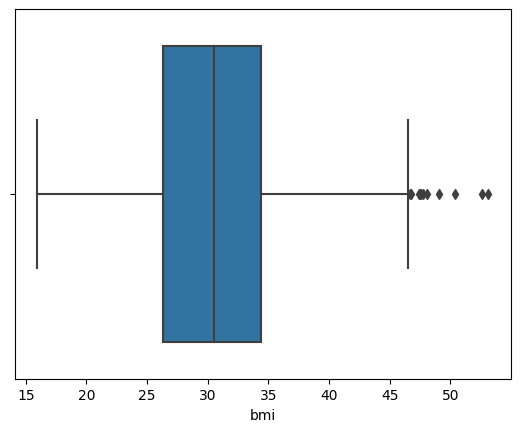

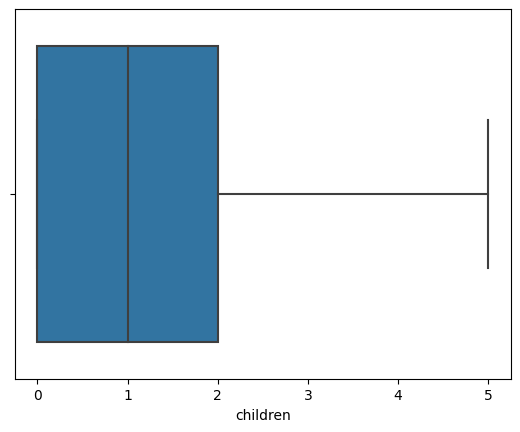

In [24]:
for i in numerical:
  sns.boxplot(data = numerical, x = i)
  plt.show()

In [25]:
Q1 = df['bmi'].quantile(0.25)
Q2 = df['bmi'].quantile(0.50)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3-Q1

upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)

df['bmi'] = df['bmi'].clip(lower=lower_limit, upper=upper_limit)

In [26]:
x = df.drop(['health_insurance_price'],axis=1)
y = df.health_insurance_price

In [27]:
x = pd.get_dummies(x, columns=['gender','location','smoking_status'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

# Making prediction on the X_test data.
y_pred = model.predict(x_test)

# Evaluation of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test R2 :",r2_score(y_test, y_pred))

Mean Absolute Error: 4218.03559965578
Mean Squared Error: 34449218.9845181
Root Mean Square Error: 5869.345703272053
Test R2 : 0.8143597950537664


Mean Absolute Error: 4218.03559965578

Mean Squared Error: 34449218.9845181

Root Mean Square Error: 5869.345703272053

Test R2 : 0.8143597950537664

In [28]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# Making prediction on the X_test data.
y_pred = model.predict(x_test)

# Evaluation of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test R2 :",r2_score(y_test, y_pred))

Mean Absolute Error: 2826.9767788352065
Mean Squared Error: 35241505.08251134
Root Mean Square Error: 5936.455599304297
Test R2 : 0.8100903178945422


In [44]:
# Initialize a RandomforestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators= 150)
model.fit(x_train,y_train)

# Making prediction on the X_test data.
y_pred = model.predict(x_test)

# Evaluation of the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('mean_squared_error =', mean_squared_error(y_test,y_pred))
print('mean_absolute_error =', mean_absolute_error(y_test,y_pred))
print('Root mean_squared_error =',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score =', r2_score(y_test,y_pred))

mean_squared_error = 19062749.886889696
mean_absolute_error = 2496.0415845138573
Root mean_squared_error = 4366.090916012823
r2_score = 0.8972745130323164


In [45]:
# Making prediction on the X_test data.
y_train_pred = model.predict(x_train)

# Evaluation of the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('mean_squared_error =', mean_squared_error(y_train, y_train_pred))
print('mean_absolute_error =', mean_absolute_error(y_train, y_train_pred))
print('Root mean_squared_error =',np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('r2_score =', r2_score(y_train, y_train_pred))

mean_squared_error = 3674533.197099958
mean_absolute_error = 1082.168172645817
Root mean_squared_error = 1916.9071957452604
r2_score = 0.9729417246735854
